In [100]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy import stats, optimize
style.use("ggplot")

In [137]:
def x(x0, pasos, A, plot = True):
    x_ = [x0]
    for i in range(pasos):
        x_.append(A * x_[-1] * (1 - x_[-1]))
    if plot:
        plt.plot(x_)
        plt.title("x(t+1) = a * x(t) * (1 - x(t))")
        plt.xlabel("t")
        plt.ylabel("x(t + 1)")
    return x_

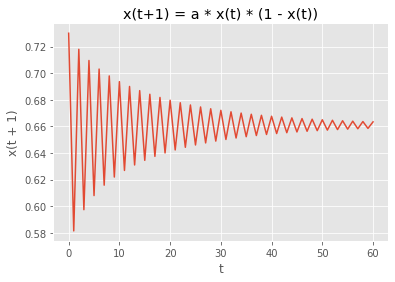

In [91]:
_ = x( x0 = .73, pasos = 60, A = 2.95)

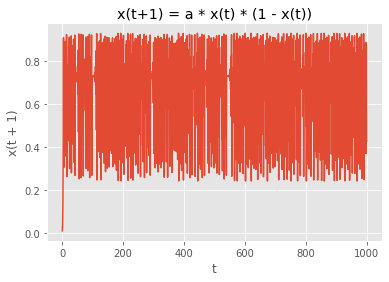

In [92]:
_ = x( x0 = .01, pasos = 1000, A = 3.72)

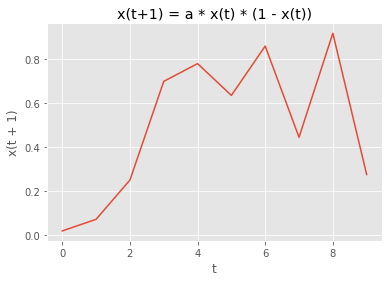

In [93]:
_ = x( x0 = .02, pasos = 9, A = 3.72)

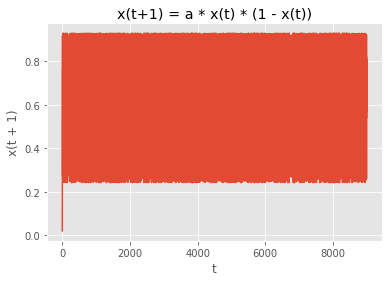

In [94]:
valores_x = x( x0 = .02, pasos = 9000, A = 3.72)

(array([   2.,    0.,  855.,  855.,  621.,  779., 1189., 1654., 1845.,
        1201.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

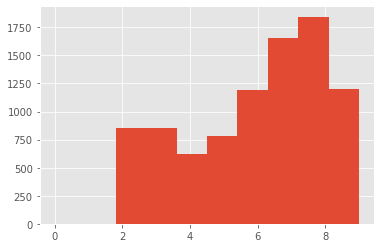

In [95]:
plt.hist([int(str(valor).split(".")[1][0]) for valor in valores_x])

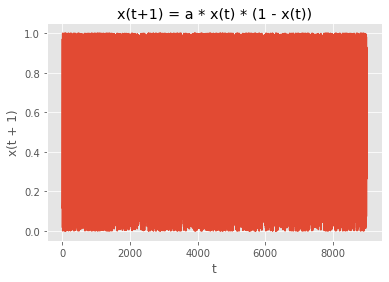

In [96]:
valores_x = x( x0 = .02, pasos = 9000, A = 4)


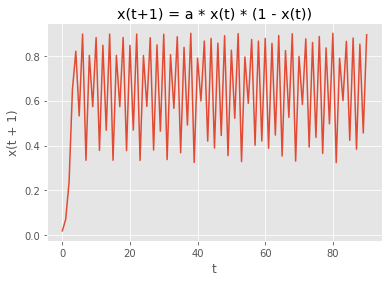

In [97]:
valores_x = x( x0 = .02, pasos = 90, A = 3.6)


(array([ 2.,  0.,  1., 19.,  0., 13., 10.,  2.,  4., 40.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

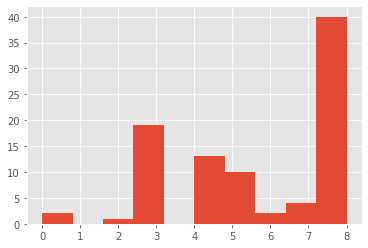

In [98]:
plt.hist([int(str(valor).split(".")[1][0]) for valor in valores_x])

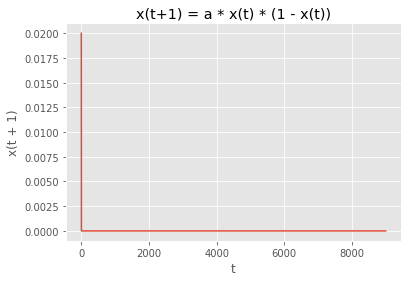

In [99]:
valores_x = x( x0 = .02, pasos = 9000, A = 0.02)


(array([8836.,   20.,   22.,   20.,   18.,   20.,   17.,   19.,   17.,
          12.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

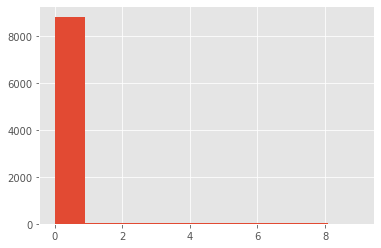

In [69]:
plt.hist([int(str(valor).split(".")[1][0]) for valor in valores_x])

In [81]:
Benford = lambda x: np.log10(1 + 1/x)
b = [Benford(x) for x in range(1, 10)]

(array([3059., 1752., 1264.,  992.,    0.,  784.,  632.,  561.,  492.,
         464.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

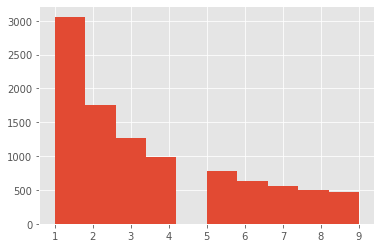

In [187]:
b_random = np.random.choice(9, 10000, replace = True, p = b) + 1
plt.hist(b_random)

10000


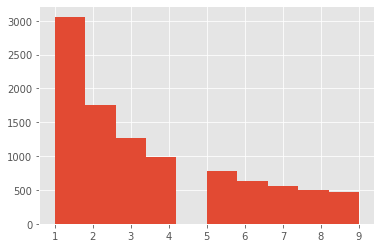

In [209]:
plt.hist(b_random)
print(len(b_random))

9001


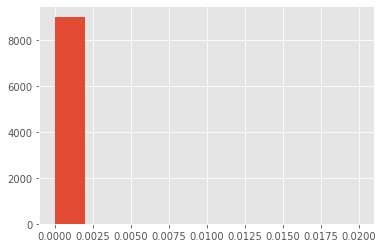

In [208]:
plt.hist(valores_x)
print(len(valores_x))

In [238]:
max(min(np.random.random() * 4, 4), 0.0000000001)

1.5894500010601065

In [301]:
def encontrar_A(A, b):
#     print(A)
    valores_x = x( x0 = .02, pasos = 300, A = A, plot = False)
#     print(valores_x)
#     [print(int(str(np.round(valor,2)).split(".")[1][0])) for valor in valores_x]
    return float(stats.ks_2samp(b, [

                int(str(int(
                    str(round(float(valor), 3)).split(".")[1].replace("e+","").replace("e-", "")
        ))[0] ) for valor in valores_x if len(str(round(float(valor), 3)).split(".")) > 1
    ])[0] )

ks = 1
max_iter = 100
i = 1
mejor_valor = max(min(np.random.random() * 4, 4), 0.0000000001)
minimo = 100
A_min = 2
while ks > .2:

    res = optimize.minimize(
        fun = encontrar_A,
        x0 = max(min(np.random.random() * 4, 4), 0.0000000001),
        args = (b_random),
        tol = 0.00001,
        bounds = ((0.0000001, 999999),)

    )
    ks = res.fun
    if ks < minimo:
        minimo = ks
        A_min = res.x[0]
    if i % 10 == 0:
        print(ks)
    i += 1
    mejor_valor = res.x
    if max_iter == i:
        break

0.6008554817275747
0.45753056478405313
0.5875664451827243
0.5875664451827243
0.49476445182724255
0.6900887043189369
0.46116644518272426
0.6008554817275747
0.9867109634551495


In [302]:
A_min

3.845994036020141

In [303]:
encontrar_A( A_min, b_random)


0.2752740863787375

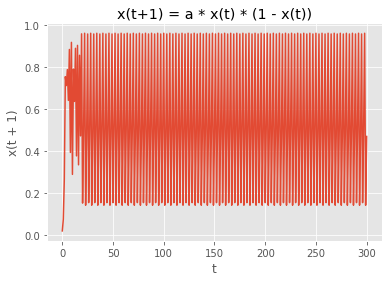

In [304]:
valores_x = x( x0 = .02, pasos = 300, A = A_min)

(array([94.,  3.,  3., 49.,  0., 46.,  2.,  5.,  3., 96.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

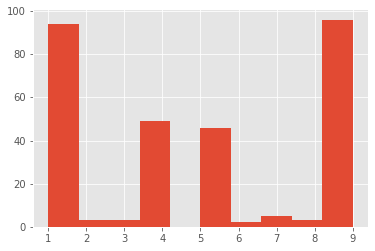

In [305]:

plt.hist([

                int(str(int(
                    str(round(float(valor), 3)).split(".")[1].replace("e+","").replace("e-", "")
        ))[0] ) for valor in valores_x if len(str(round(float(valor), 3)).split(".")) > 1
    ], )

In [306]:
stats.ks_2samp(b_random, [

                int(str(int(
                    str(round(float(valor), 3)).split(".")[1].replace("e+","").replace("e-", "")
        ))[0] ) for valor in valores_x if len(str(round(float(valor), 3)).split(".")) > 1
    ])

KstestResult(statistic=0.2752740863787375, pvalue=1.887379141862766e-15)